### Netflix Media Dataset EDA - Full Script

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [12]:
# Load Dataset
netflix_titles = pd.read_csv("CLEAN DATA.csv")

In [14]:
# Quick overview
print("Dataset Shape:", netflix_titles.shape)
print("\nColumns Info:\n")
print(netflix_titles.info())
print("\nMissing Values (%):\n")
print((netflix_titles.isna().sum() / len(netflix_titles)) * 100)
print("\nDuplicates:", netflix_titles.duplicated().sum())

Dataset Shape: (8804, 16)

Columns Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8804 entries, 0 to 8803
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   show_id            8804 non-null   object 
 1   type               8804 non-null   object 
 2   title              8804 non-null   object 
 3   director           8804 non-null   object 
 4   casts              8804 non-null   object 
 5   country            8804 non-null   object 
 6   date_added         8794 non-null   object 
 7   release_year       8804 non-null   int64  
 8   rating             8804 non-null   object 
 9   duration_original  8804 non-null   object 
 10  duration_int       8804 non-null   int64  
 11  duration_type      8804 non-null   object 
 12  listed_in          8804 non-null   object 
 13  description        8804 non-null   object 
 14  year_added         8794 non-null   float64
 15  month_added        8794 non-nu

In [16]:
# Date Processing
netflix_titles['date_added'] = pd.to_datetime(netflix_titles['date_added'], errors='coerce')
netflix_titles['year_added'] = netflix_titles['date_added'].dt.year

In [20]:
# Most added year
most_added_year = netflix_titles['year_added'].value_counts().idxmax()
print("\nYear with Most Titles Added:", int(most_added_year))


Year with Most Titles Added: 2019


In [22]:
# Movies vs TV Shows Trend
netflix_titles_non_null = netflix_titles[netflix_titles['year_added'].notnull()]
type_trend = netflix_titles_non_null.groupby(['year_added', 'type'])['show_id'].count().unstack()

In [94]:
# Folder to save plots
output_folder = r"C:\Users\USER\SYNTECXHUB INTERNSHIP\plots"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

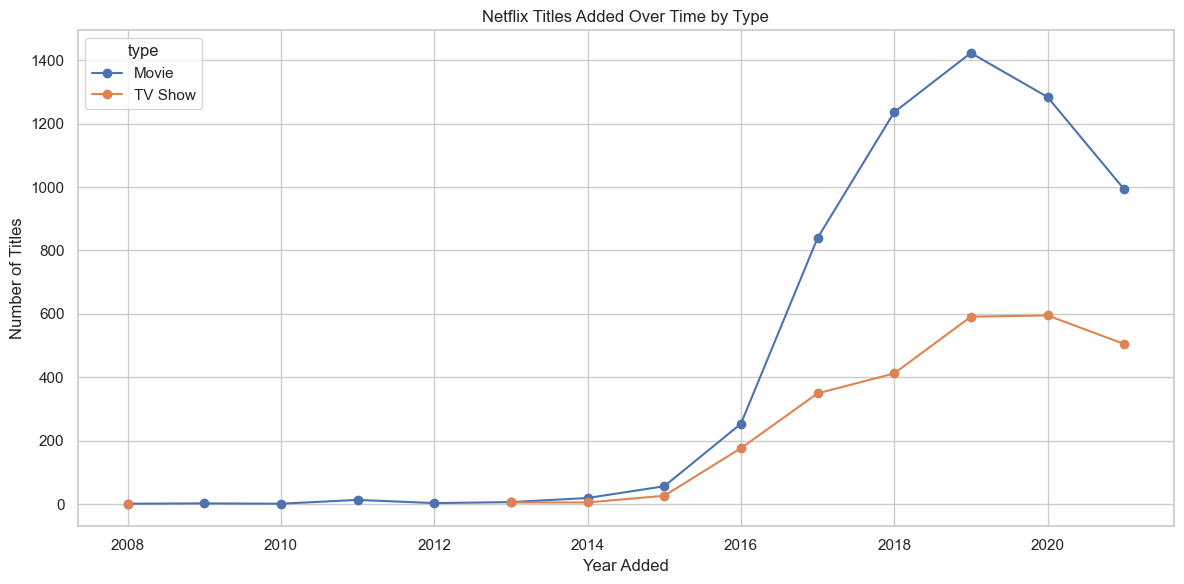

In [96]:
# Plot
type_trend.plot(kind='line', marker='o', title='Netflix Titles Added Over Time by Type')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "movies_vs_tv_trend.png"), bbox_inches='tight')
plt.show()

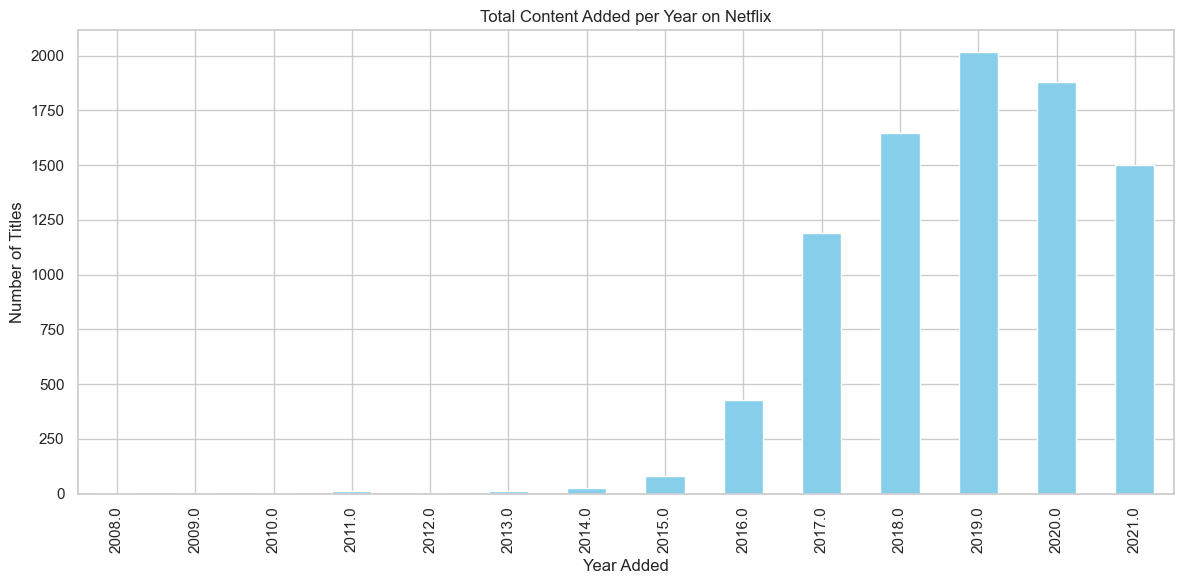

In [98]:
# Content Growth Over Time
netflix_titles_non_null.groupby('year_added')['show_id'].count().plot(
    kind='bar', color='skyblue', title='Total Content Added per Year on Netflix'
)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "content_growth.png"), bbox_inches='tight')
plt.show()

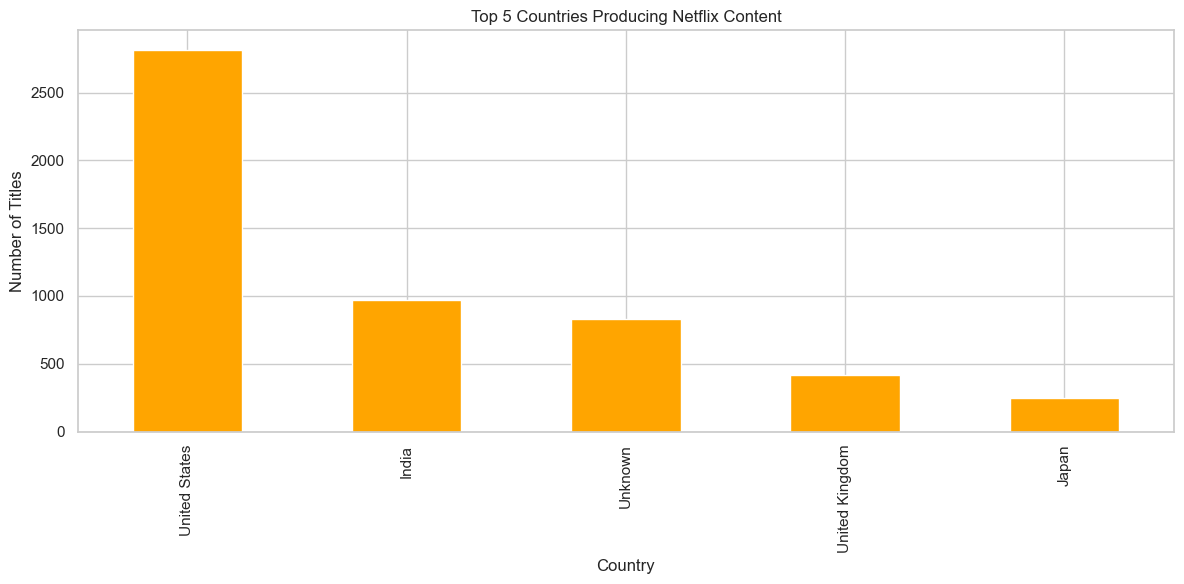

In [100]:
# Top Countries Producing Content
country_counts = netflix_titles['country'].value_counts()
country_counts.head(5).plot(kind='bar', color='orange', title='Top 5 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "top_countries.png"), bbox_inches='tight')
plt.show()

In [42]:
# Top TV Show / Movie Countries
top_tv = netflix_titles[netflix_titles['type'] == 'TV Show']['country'].value_counts().head(5)
top_movies = netflix_titles[netflix_titles['type'] == 'Movie']['country'].value_counts().head(5)

print("\nTop TV Show Countries:\n", top_tv)
print("\nTop Movie Countries:\n", top_movies)


Top TV Show Countries:
 country
United States     760
Unknown           390
United Kingdom    213
Japan             169
South Korea       158
Name: count, dtype: int64

Top Movie Countries:
 country
United States     2058
India              892
Unknown            440
United Kingdom     206
Canada             122
Name: count, dtype: int64


### Genres Analysis

In [45]:
# Prepare genre series
genre_series = netflix_titles['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
genre_counts = Counter([genre for sublist in genre_series for genre in sublist])
common_genres = pd.Series(genre_counts).sort_values(ascending=False).head(10)

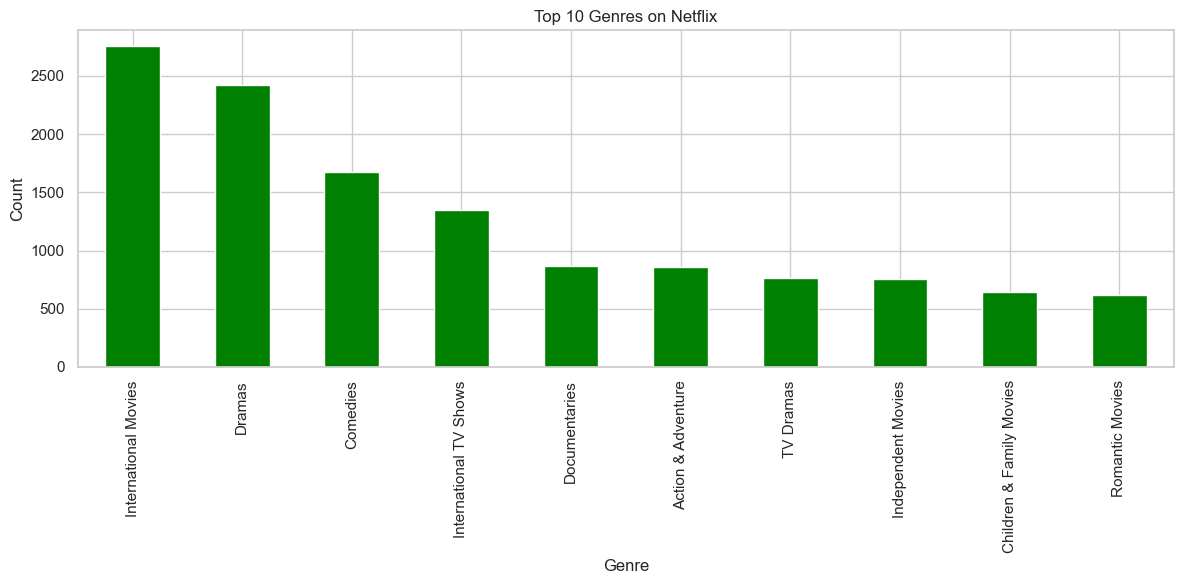

In [102]:
# Plot top genres
common_genres.plot(kind='bar', color='green', title='Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "top_genres.png"), bbox_inches='tight')
plt.show()

In [51]:
# By type
for t in ['Movie', 'TV Show']:
    temp = netflix_titles[netflix_titles['type'] == t]
    genre_series_temp = temp['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
    genre_counts_temp = Counter([genre for sublist in genre_series_temp for genre in sublist])
    print(f"\nTop Genres in {t}s:\n", pd.Series(genre_counts_temp).sort_values(ascending=False).head(5))


Top Genres in Movies:
 International Movies    2752
Dramas                  2425
Comedies                1673
Documentaries            869
Action & Adventure       859
dtype: int64

Top Genres in TV Shows:
 International TV Shows    1350
TV Dramas                  762
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
dtype: int64


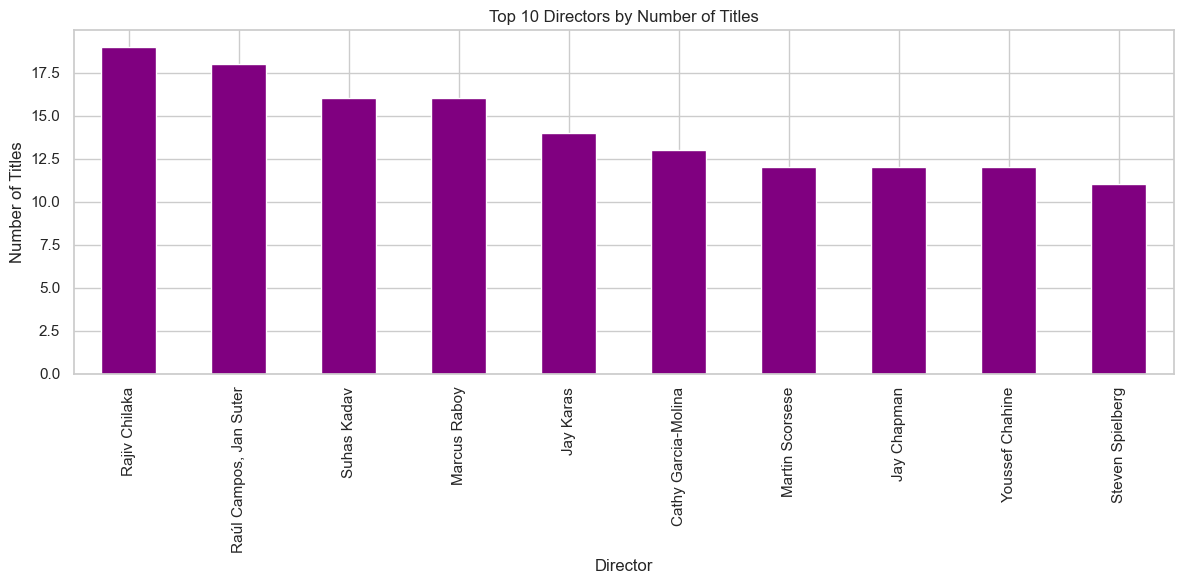

In [104]:
# Top Directors
netflix_titles_filtered_directors = netflix_titles[~netflix_titles['director'].isin(['Unknown', None, '']) & netflix_titles['director'].notnull()]
top_directors = netflix_titles_filtered_directors['director'].value_counts().head(10)
top_directors.plot(kind='bar', color='purple', title='Top 10 Directors by Number of Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "top_directors.png"), bbox_inches='tight')
plt.show()

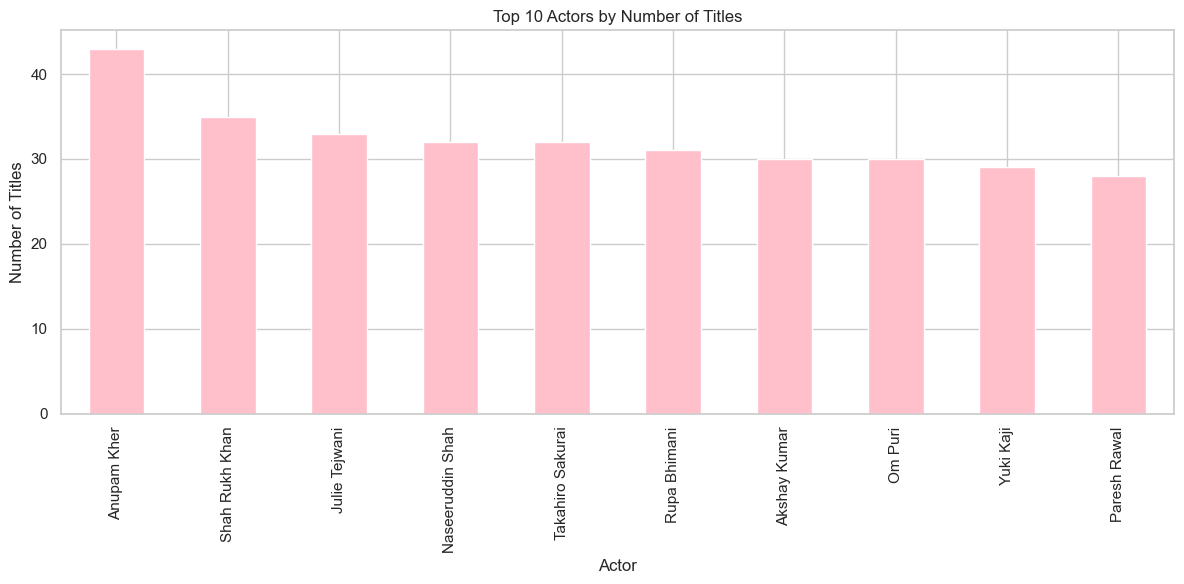

In [106]:
# Top Actors
cast_series = netflix_titles['casts'].dropna().apply(lambda x: [i.strip() for i in x.split(',') if i.strip().lower() != 'unknown'])
actor_counts = Counter([actor for sublist in cast_series for actor in sublist])
top_actors = pd.Series(actor_counts).sort_values(ascending=False).head(10)
top_actors.plot(kind='bar', color='pink', title='Top 10 Actors by Number of Titles')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "top_actors.png"), bbox_inches='tight')
plt.show()

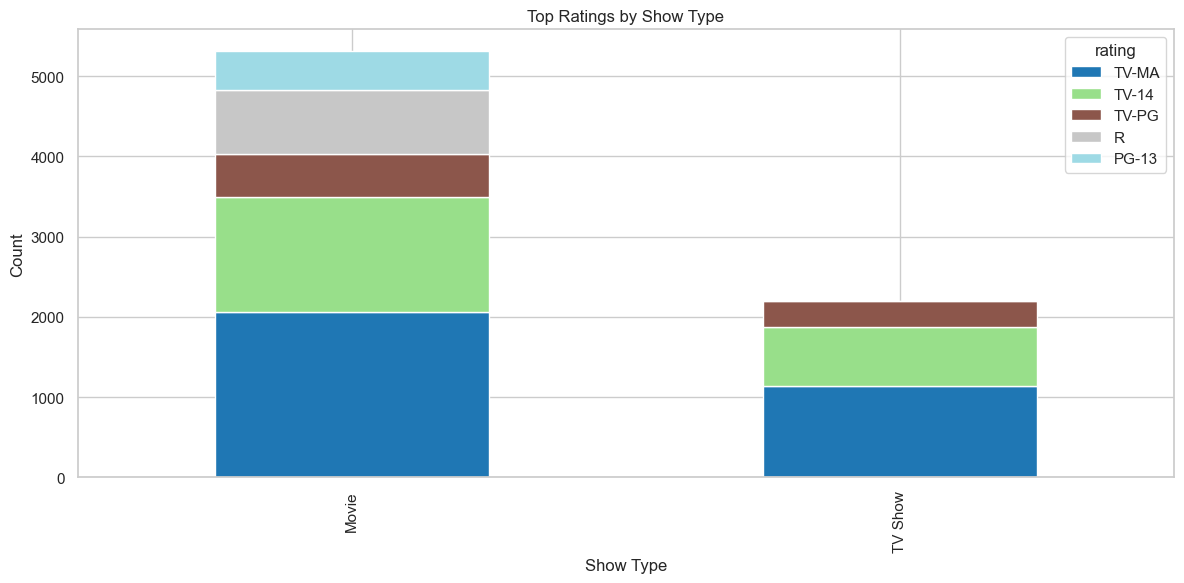

In [108]:
# Ratings Analysis
rating_counts = netflix_titles.groupby('type')['rating'].value_counts().unstack(fill_value=0)
top_ratings = rating_counts.sum().sort_values(ascending=False).head(5).index
rating_counts_top = rating_counts[top_ratings]
rating_counts_top.plot(kind='bar', stacked=True, title='Top Ratings by Show Type', colormap='tab20')
plt.xlabel('Show Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "top_ratings.png"), bbox_inches='tight')
plt.show()

In [59]:
# Duration Analysis
netflix_titles_filtered = netflix_titles[netflix_titles['duration_int'].notnull()]
movie_avg = netflix_titles_filtered[netflix_titles_filtered['type'] == 'Movie']['duration_int'].mean()
tv_avg = netflix_titles_filtered[netflix_titles_filtered['type'] == 'TV Show']['duration_int'].mean()

print("\nAverage Movie Duration (mins):", round(movie_avg,2))
print("Average TV Show Duration (seasons):", round(tv_avg,2))


Average Movie Duration (mins): 99.55
Average TV Show Duration (seasons): 1.77


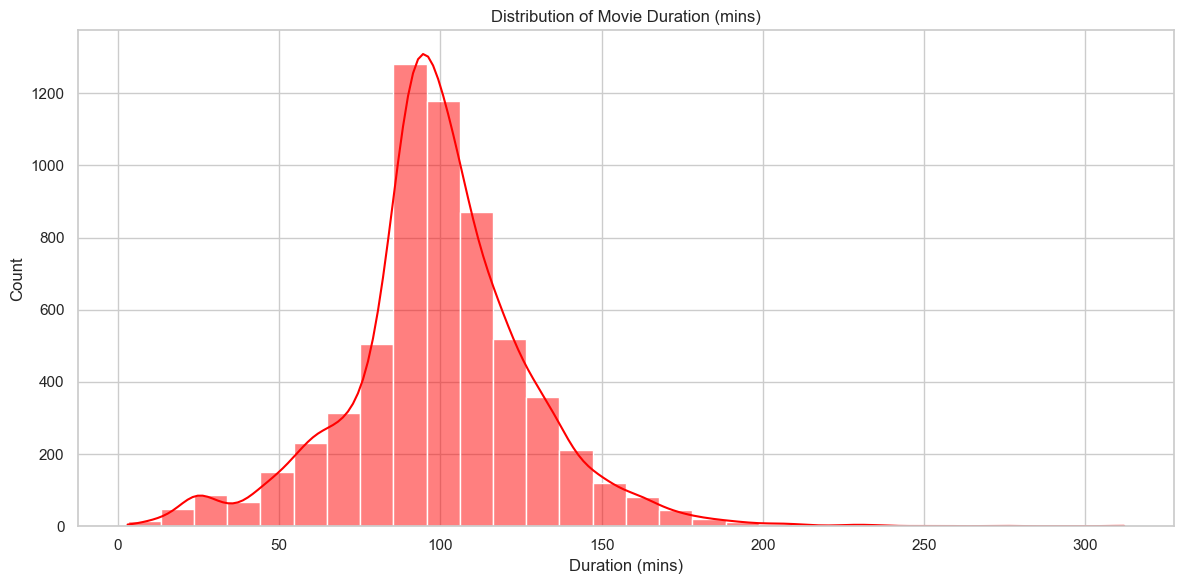

In [110]:
# Movie distribution
sns.histplot(netflix_titles_filtered[netflix_titles_filtered['type'] == 'Movie']['duration_int'], bins=30, kde=True, color='red')
plt.title('Distribution of Movie Duration (mins)')
plt.xlabel('Duration (mins)')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "movie_duration.png"), bbox_inches='tight')
plt.show()

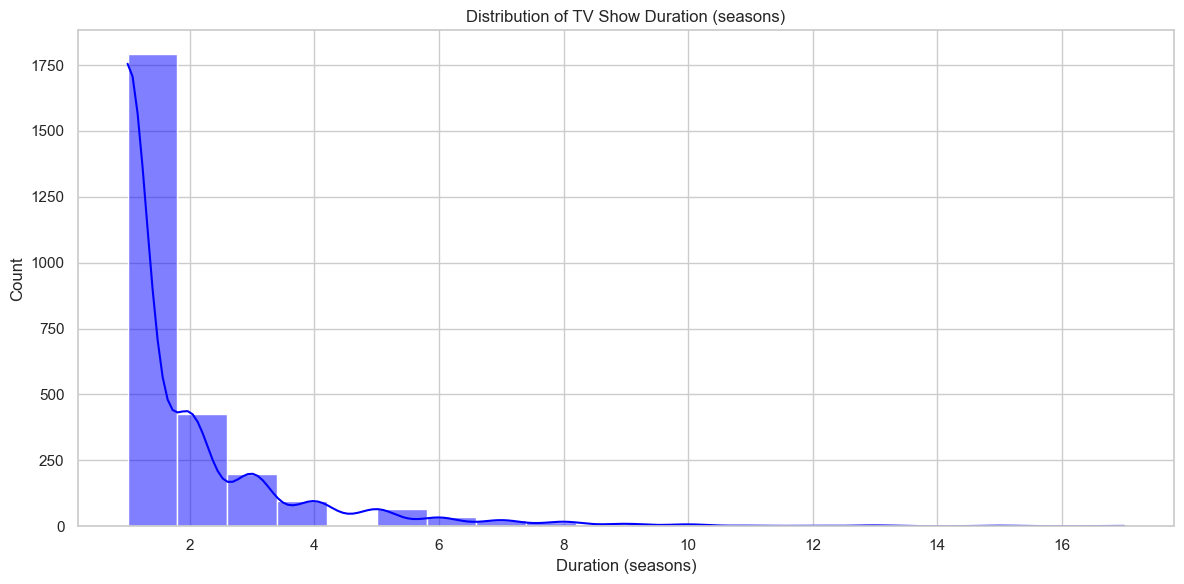

In [112]:
# TV distribution
sns.histplot(netflix_titles_filtered[netflix_titles_filtered['type'] == 'TV Show']['duration_int'], bins=20, kde=True, color='blue')
plt.title('Distribution of TV Show Duration (seasons)')
plt.xlabel('Duration (seasons)')
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "tv_duration.png"), bbox_inches='tight')
plt.show()

In [65]:
# Export Summary Report
summary_report = f"""
Netflix EDA Summary Report
--------------------------
Dataset Shape: {netflix_titles.shape}
Most Titles Added in Year: {most_added_year}

Top Countries (Overall):
{country_counts.head(10).to_string()}

Top Genres:
{common_genres.to_string()}

Top Directors:
{top_directors.to_string()}

Top Actors:
{top_actors.to_string()}

Average Movie Duration (mins): {round(movie_avg,2)}
Average TV Show Duration (seasons): {round(tv_avg,2)}
"""

In [114]:
# 3️⃣ Save Summary Report
# -----------------------------
summary_file = os.path.join(output_folder, "Netflix_EDA_Summary.txt")
with open(summary_file, "w") as f:
    f.write(summary_report)

print(f"\n✅ Summary Report Saved to '{summary_file}'")
print(f"✅ All Plots Saved in '{output_folder}' Folder")


✅ Summary Report Saved to 'C:\Users\USER\SYNTECXHUB INTERNSHIP\plots\Netflix_EDA_Summary.txt'
✅ All Plots Saved in 'C:\Users\USER\SYNTECXHUB INTERNSHIP\plots' Folder


In [116]:
summary_file = r"C:\Users\USER\SYNTECXHUB INTERNSHIP\plots\Netflix_EDA_Summary.txt"

with open(summary_file, "w", encoding="utf-8") as f:
    f.write(summary_report)

print("✅ Summary Report saved successfully with UTF-8 encoding.")

✅ Summary Report saved successfully with UTF-8 encoding.
